In [1]:
# Note: for the PQ plots of the recombinant protein complexes, see CellLysateMixing_PQ_Upload.ipynb

import sys
sys.path.insert(1, '../..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from ProdSeqAnalysis_utils import *
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:

H4_bc = "TGTATCAGTT"
H3K4me3_bc = "GTAGTGGCAT"
H3K27ac_bc = "GTTATTAGGC"
H3K27me3_bc = "TAACATGCGG"
EZH2_bc = "TGGCTAATGT"
EGFR_bc = "TGACCTTATG"
HAtag_bc = "GATTGTCCGC"
H3K27M_bc = "CACGATTGTT"
AEBP2_bc = "TTGCATGGTA"
EED_bc = "TTGAGTAACC"
SUZ12_bc = "TGAGTCGATT"
MED12_bc = "CTATGTTGGT"
CycC_bc = "GAGGATAAGT"

All12_pool = [
    H3K4me3_bc, 
    H3K27ac_bc, 
    H3K27me3_bc, EZH2_bc, EED_bc, SUZ12_bc, AEBP2_bc, 
    MED12_bc, CycC_bc, 
    H3K27M_bc,
    EGFR_bc, HAtag_bc
]

bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

XmnI_midseq = "TAGAGAAG"

In [ ]:
PRC2_dir = "/path/to/PRC2/fastq/"
PRC2_cnts, PRC2_QC = CountUMIPairs(PRC2_dir + "Name_of_R1.fastq.gz",
                                   PRC2_dir + "Name_of_R2.fastq.gz",
                                   All12_pool, XmnI_midseq, 15)

K4K27_dir = "/path/to/H3K4me3K27ac/fastq/"
K4K27_cnts, K4K27_QC = CountUMIPairs(K4K27_dir + "Name_of_R1.fastq.gz",
                                   K4K27_dir + "Name_of_R2.fastq.gz",
                                   All12_pool, XmnI_midseq, 15)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

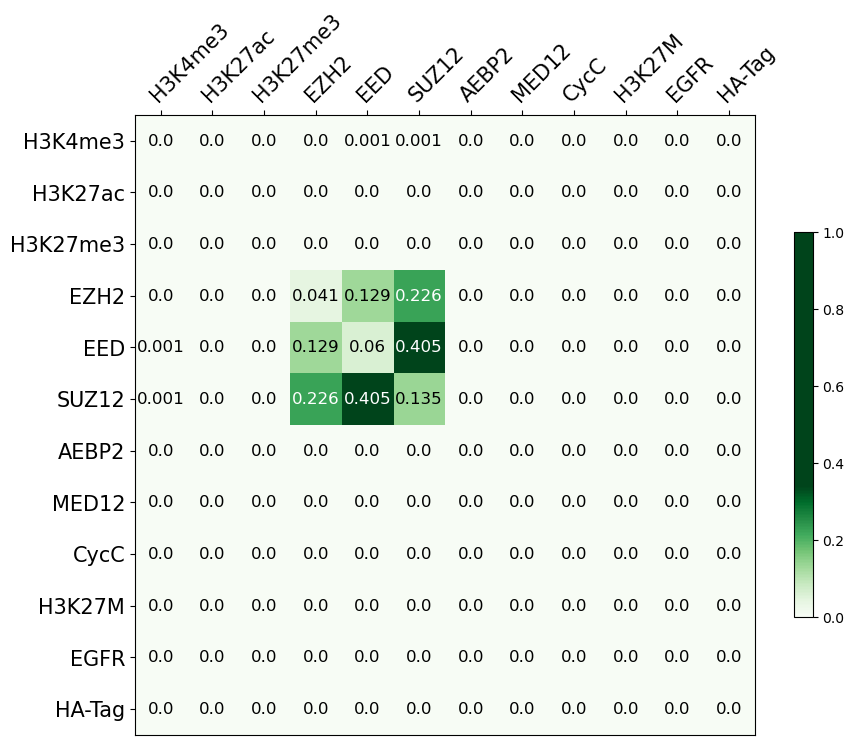

In [4]:
color_thres_num = 88
colors1 = plt.cm.Greens(np.linspace(0, 1, color_thres_num))
colors2 = plt.cm.Greens(np.linspace(1, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

fig, ax = plt.subplots(figsize = (10, 10))

PRC2_tot_sum = 0
for i in range(len(bc_nms)):
    for j in range(i, len(bc_nms)):
        PRC2_tot_sum += PRC2_cnts[i][j]

PRC2_props = np.zeros((len(bc_nms), len(bc_nms)))
for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        PRC2_props[i][j] = PRC2_cnts[i][j] / PRC2_tot_sum

im = ax.imshow(PRC2_props, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms)
ax.set_yticklabels(bc_nms)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        curr_val = round((PRC2_cnts[i][j]) / PRC2_tot_sum, 3)
        if (curr_val < 0.2):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("PRC2_heatmap.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

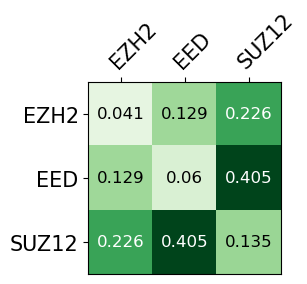

In [5]:
fig, ax = plt.subplots(figsize = (10/4, 10/4))

im = ax.imshow([x[3:6] for x in PRC2_props[3:6]], cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(bc_nms[3:6])
ax.set_yticklabels(bc_nms[3:6])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in [3, 4, 5]:
    for j in [3, 4, 5]:
        curr_val = round((PRC2_cnts[i][j]) / PRC2_tot_sum, 3)
        if (curr_val < 0.2):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j - 3, i - 3, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("PRC2_heatmap_zoomin.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

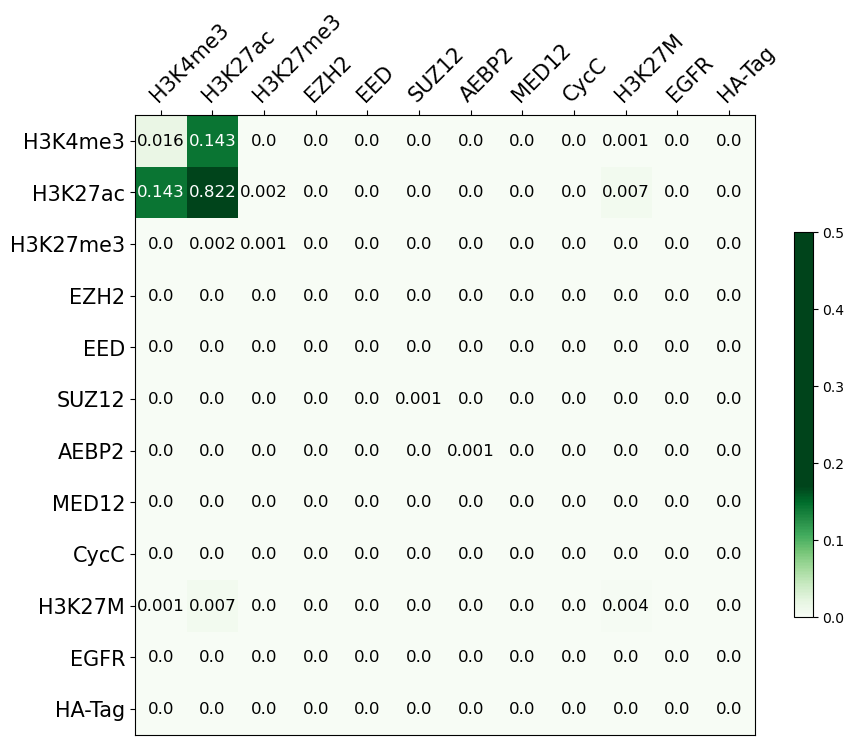

In [6]:
color_thres_num = 88
colors1 = plt.cm.Greens(np.linspace(0, 1, color_thres_num))
colors2 = plt.cm.Greens(np.linspace(1, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

fig, ax = plt.subplots(figsize = (10, 10))

K4K27_tot_sum = 0
for i in range(len(bc_nms)):
    for j in range(i, len(bc_nms)):
        K4K27_tot_sum += K4K27_cnts[i][j]

K4K27_props = np.zeros((len(bc_nms), len(bc_nms)))
for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        K4K27_props[i][j] = K4K27_cnts[i][j] / K4K27_tot_sum

im = ax.imshow(K4K27_props, cmap = customized_cmap, vmin = 0, vmax = 0.5)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms)
ax.set_yticklabels(bc_nms)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")



for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        curr_val = round((K4K27_cnts[i][j]) / K4K27_tot_sum, 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("K4K27_heatmap.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

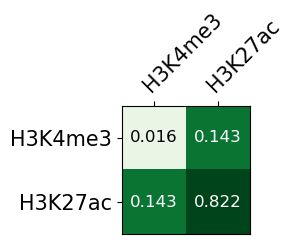

In [7]:
fig, ax = plt.subplots(figsize = (10/6, 10/6))

im = ax.imshow([x[0:2] for x in K4K27_props[0:2]], cmap = customized_cmap, vmin = 0, vmax = 0.5)

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(bc_nms[0:2])
ax.set_yticklabels(bc_nms[0:2])
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.xaxis.tick_top()
# fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(2):
    for j in range(2):
        curr_val = round((K4K27_cnts[i][j]) / K4K27_tot_sum, 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("K4K27_heatmap_zoomin.svg", dpi = 1200)

In [ ]:
recombinant_path = "/path/to/all/recombinant/fastq/"

K4K27_list = [
    [recombinant_path + "Name_of_H3K4me3K27ac_sample1_R1.fastq.gz", recombinant_path + "Name_of_H3K4me3K27ac_sample1_R2.fastq.gz"],
    [recombinant_path + "Name_of_H3K4me3K27ac_sample2_R1.fastq.gz", recombinant_path + "Name_of_H3K4me3K27ac_sample2_R2.fastq.gz"],
    [recombinant_path + "Name_of_H3K4me3K27ac_sample3_R1.fastq.gz", recombinant_path + "Name_of_H3K4me3K27ac_sample3_R2.fastq.gz"],
    [recombinant_path + "Name_of_H3K4me3K27ac_sample4_R1.fastq.gz", recombinant_path + "Name_of_H3K4me3K27ac_sample4_R2.fastq.gz"],
]

PRC2_list = [
    [recombinant_path + "Name_of_PRC2_sample1_R1.fastq.gz", recombinant_path + "Name_of_PRC2_sample1_R2.fastq.gz"],
    [recombinant_path + "Name_of_PRC2_sample2_R1.fastq.gz", recombinant_path + "Name_of_PRC2_sample2_R2.fastq.gz"],
    [recombinant_path + "Name_of_PRC2_sample3_R1.fastq.gz", recombinant_path + "Name_of_PRC2_sample3_R2.fastq.gz"],
    [recombinant_path + "Name_of_PRC2_sample4_R1.fastq.gz", recombinant_path + "Name_of_PRC2_sample4_R2.fastq.gz"],
]

K4K27_list_cnts = []
K4K27_list_qc = []
PRC2_list_cnts = []
PRC2_list_qc = []

for i in range(4):
    curr_cnts, curr_qc = CountUMIPairs(K4K27_list[i][0], K4K27_list[i][1], All12_pool, XmnI_midseq, 15)
    K4K27_list_cnts.append(curr_cnts)
    K4K27_list_qc.append(curr_qc)

for i in range(4):
    curr_cnts, curr_qc = CountUMIPairs(PRC2_list[i][0], PRC2_list[i][1], All12_pool, XmnI_midseq, 15)
    PRC2_list_cnts.append(curr_cnts)
    PRC2_list_qc.append(curr_qc)


In [9]:
def ReproducibilityScatterplot(all_data_vecs, shapes, sample_type = "reps", plot_all_pairwise = False):
    fig = plt.figure(figsize = (6, 6))

    curr_max = -1
    shape_idx = 0
    for i in range(len(all_data_vecs)):
        for j in range(i + 1, len(all_data_vecs)):
            curr_max = max(curr_max, max(max(all_data_vecs[i]), max(all_data_vecs[j])))
            if (sample_type == "reps"):
                plt.scatter(all_data_vecs[i], all_data_vecs[j], s = 150,
                           label = "Reps: " + str(i + 1) + " vs " + str(j + 1), alpha = 0.35, marker = shapes[shape_idx])
            else:
                plt.scatter(all_data_vecs[i], all_data_vecs[j], s = 150,
                           label = sample_nms[i] + " vs " + sample_nms[j], alpha = 0.35, marker = shapes[shape_idx])
            shape_idx += 1

    plt.legend(fontsize = 15)
    print(curr_max)
    plt.plot([0, curr_max], [0, curr_max], linestyle=':', c = "red")
    plt.xlabel("Replicate A - PPI proportion of UMI pairs", fontsize = 15)
    plt.ylabel("Replicate B - PPI proportion of UMI pairs", fontsize = 15)
    plt.gca().tick_params(axis='both', which='major', labelsize=12) 
    plt.xscale('log')
    plt.yscale('log')

    if (plot_all_pairwise):
        for i in range(len(all_data_vecs)):
            for j in range(i + 1, len(all_data_vecs)):
                plt.figure(figsize = (6, 6))
                curr_max = max(max(all_data_vecs[i]), max(all_data_vecs[j]))
                plt.scatter(all_data_vecs[i], all_data_vecs[j], s = 5)
                plt.plot([0, curr_max], [0, curr_max], linestyle=':', c = "red")
                plt.xscale('log')
                plt.yscale('log')
                if (sample_type == "reps"):
                    plt.xlabel("Rep " + str(i + 1) + " - PPI proportion of UMI pairs")
                    plt.ylabel("Rep " + str(j + 1) + " - PPI proportion of UMI pairs")
                else:
                    plt.xlabel("Rep " + sample_nms[i] + " - PPI proportion of UMI pairs")
                    plt.ylabel("Rep " + sample_nms[j] + " - PPI proportion of UMI pairs")
    return fig

In [10]:
PRC2_list_cnts_flatten = [x.flatten() for x in PRC2_list_cnts]
PRC2_list_cnts_flatten_normed = []
for idx in range(len(PRC2_list_cnts_flatten)):
    curr_sum = 0
    for i in range(len(PRC2_list_cnts[idx])):
        for j in range(i, len(PRC2_list_cnts[idx])):
            curr_sum += (PRC2_list_cnts[idx])[i][j]
    PRC2_list_cnts_flatten_normed.append([x / curr_sum for x in PRC2_list_cnts_flatten[idx]])

K4K27_list_cnts_flatten = [x.flatten() for x in K4K27_list_cnts]
K4K27_list_cnts_flatten_normed = []
for idx in range(len(K4K27_list_cnts_flatten)):
    curr_sum = 0
    for i in range(len(K4K27_list_cnts[idx])):
        for j in range(i, len(K4K27_list_cnts[idx])):
            curr_sum += (K4K27_list_cnts[idx])[i][j]
    K4K27_list_cnts_flatten_normed.append([x / curr_sum for x in K4K27_list_cnts_flatten[idx]])

findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


0.8220027712542549


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

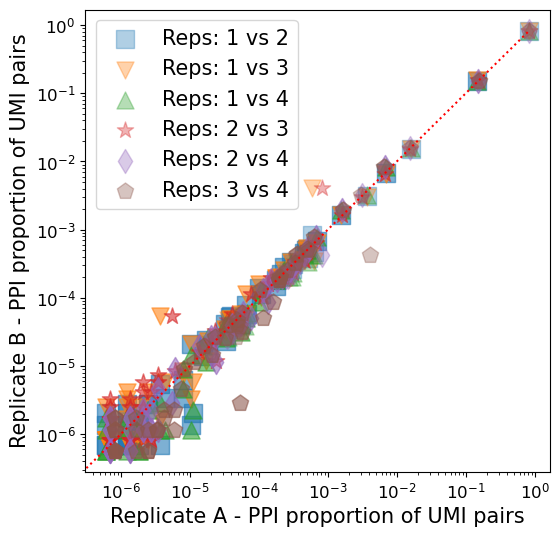

In [11]:
fig = ReproducibilityScatterplot(K4K27_list_cnts_flatten_normed, ["s", "v", "^", "*", "d", "p"])
# fig.savefig("K4K27_scatter.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


0.41117710927115286


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

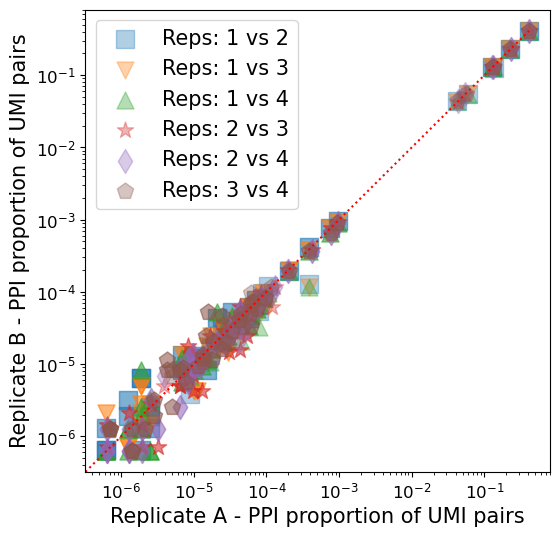

In [12]:
fig = ReproducibilityScatterplot(PRC2_list_cnts_flatten_normed, ["s", "v", "^", "*", "d", "p"])
# fig.savefig("PRC2_scatter.svg", dpi = 1200)